# 🏥 Healthcare Dataset - Exploratory Data Analysis

## 1. Import Libraries

In [1]:
"""
Author: Piyush Tanwani
Project: Healthcare Data Analysis (EDA)
Tools Used: Python, Pandas, NumPy, Matplotlib, Seaborn
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## 2. Load Dataset

In [2]:
df = pd.read_csv("healthcare_dataset.csv")

## 3. Data Overview

In [3]:
# Display First 5 rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
# Display last 5 Rows
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [5]:
print(f"There are Total {df.shape[0]} Patients and {df.shape[1]} Features are available in the dataset")

There are Total 55500 Patients and 15 Features are available in the dataset


In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### The dataset contains 15 columns, out of which 3 are numerical (Age, Billing Amount, Room Number) and the remaining 12 are categorical or date-based features.

The Test Results column appears to be the outcome of the healthcare dataset

## 4. Data Cleaning

In [7]:

# Check missing values in each column.
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

As you can see there are no missing values

In [8]:
# Are there any columns with incorrect data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
# How many duplicates are there?
duplicate = df[df.duplicated(subset=['Name','Date of Admission'],keep=False)]
duplicate = duplicate.sort_values(by=['Name','Date of Admission'])
print(f"There are total {duplicate.shape[0]} Duplicate values including orignal one")

There are total 11000 Duplicate values including orignal one


In [10]:
df['Age'] = df.groupby(['Name', 'Date of Admission'])['Age'].transform('min')
df = df.drop_duplicates(subset=['Name', 'Date of Admission'])
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,JOSepH PaUl,64,Male,O+,Hypertension,2022-06-28,Arthur Fleming,"and Williams, Brown Mckenzie",Blue Cross,24747.348916,256,Emergency,2022-07-09,Paracetamol,Inconclusive
49996,braDleY dAniEL,69,Male,B+,Cancer,2020-04-04,Mark Moore,Wise Ltd,Medicare,40657.582493,463,Elective,2020-04-17,Aspirin,Abnormal
49997,LiSa sIMPsoN,73,Male,O-,Cancer,2023-09-08,Deborah Sutton,"Moreno Murphy, Griffith and",Blue Cross,8441.147064,411,Elective,2023-09-22,Aspirin,Abnormal
49998,RoGER farRELl,81,Male,B-,Cancer,2020-10-13,Mary Bartlett,Sons Smith and,Blue Cross,34934.284113,144,Elective,2020-10-14,Penicillin,Abnormal


# Duplicates have been removed from this dataset and there are total 50000 patients without duplicate values


Duplicate records were identified based on Name and Date of Admission. In cases where all fields were identical except Age, the minimum age was retained to resolve inconsistency, and redundant rows were removed to maintain data integrity.

## 5. Data Visualization

Text(0.5, 1.0, 'Distribution of patient age')

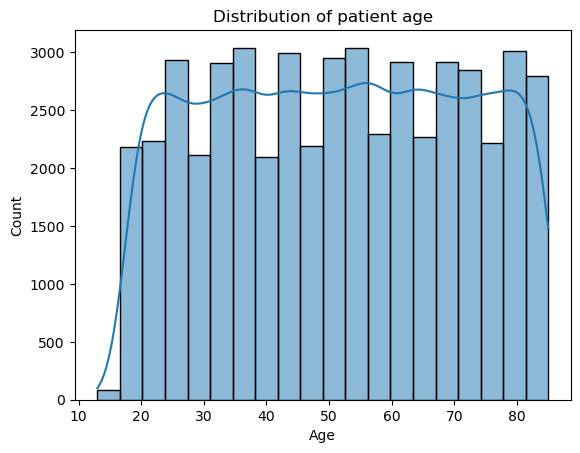

In [11]:
sns.histplot(df['Age'],kde=True,bins=20)
plt.title("Distribution of patient age")

In [12]:
# Mean age

df['Age'].mean()

51.42118

In [13]:
# Median age

df['Age'].median()

52.0

In [14]:
# Age Range

print(f"The range of Age is {df['Age'].min()} - {df['Age'].max()}")

The range of Age is 13 - 85


<Axes: xlabel='Gender', ylabel='count'>

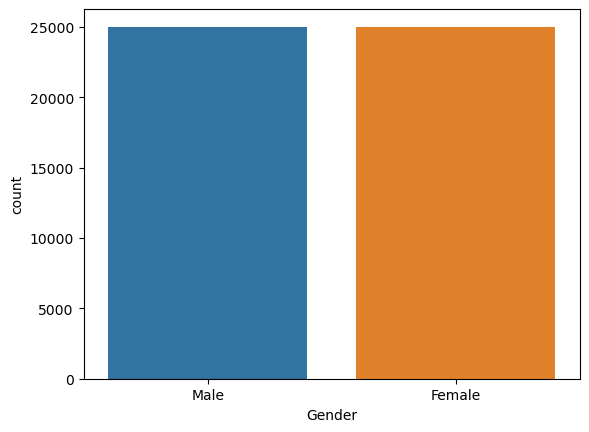

In [15]:
# Plot a countplot for Gender

sns.countplot(x=df['Gender'])

<Axes: xlabel='Medical Condition', ylabel='count'>

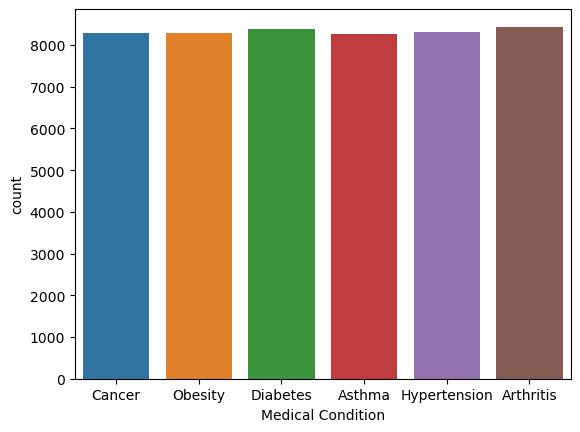

In [16]:
# Plot a countplot for Gender

sns.countplot(x=df['Medical Condition'])

In [17]:
# Extract Days from the date of admission and discharge date

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                50000 non-null  object        
 1   Age                 50000 non-null  int64         
 2   Gender              50000 non-null  object        
 3   Blood Type          50000 non-null  object        
 4   Medical Condition   50000 non-null  object        
 5   Date of Admission   50000 non-null  datetime64[ns]
 6   Doctor              50000 non-null  object        
 7   Hospital            50000 non-null  object        
 8   Insurance Provider  50000 non-null  object        
 9   Billing Amount      50000 non-null  float64       
 10  Room Number         50000 non-null  int64         
 11  Admission Type      50000 non-null  object        
 12  Discharge Date      50000 non-null  datetime64[ns]
 13  Medication          50000 non-null  object        


In [18]:
df['Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,JOSepH PaUl,64,Male,O+,Hypertension,2022-06-28,Arthur Fleming,"and Williams, Brown Mckenzie",Blue Cross,24747.348916,256,Emergency,2022-07-09,Paracetamol,Inconclusive,11
49996,braDleY dAniEL,69,Male,B+,Cancer,2020-04-04,Mark Moore,Wise Ltd,Medicare,40657.582493,463,Elective,2020-04-17,Aspirin,Abnormal,13
49997,LiSa sIMPsoN,73,Male,O-,Cancer,2023-09-08,Deborah Sutton,"Moreno Murphy, Griffith and",Blue Cross,8441.147064,411,Elective,2023-09-22,Aspirin,Abnormal,14
49998,RoGER farRELl,81,Male,B-,Cancer,2020-10-13,Mary Bartlett,Sons Smith and,Blue Cross,34934.284113,144,Elective,2020-10-14,Penicillin,Abnormal,1


Text(0.5, 1.0, 'Outliers in Treatment Cost')

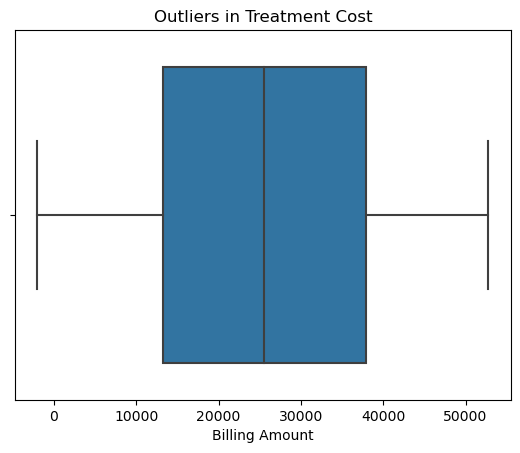

In [19]:
sns.boxplot(x=df['Billing Amount'])
plt.title('Outliers in Treatment Cost')

Text(0.5, 1.0, 'Outliers in Hospitals Stay Duration')

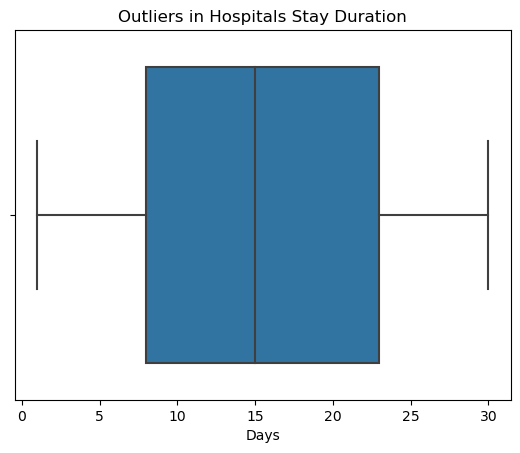

In [20]:
sns.boxplot(x=df['Days'])
plt.title('Outliers in Hospitals Stay Duration')

#### Scatter Plot is suitable for comapring AGE vs Treatment Cost

Text(0.5, 1.0, 'Age vs Treatment Cost')

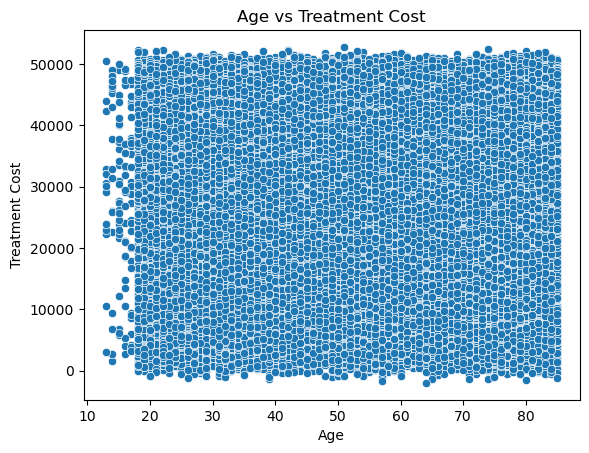

In [21]:
sns.scatterplot(x='Age',y='Billing Amount',data=df)
plt.xlabel('Age')
plt.ylabel('Treatment Cost')
plt.title('Age vs Treatment Cost')

In [22]:
gender_avg_cost = df.groupby('Gender')['Billing Amount'].mean().reset_index()
gender_avg_cost

,Gender,Billing Amount
0,Female,25481.626284
1,Male,25629.822035


Text(0.5, 1.0, 'Average Treatment Cost by Gender')

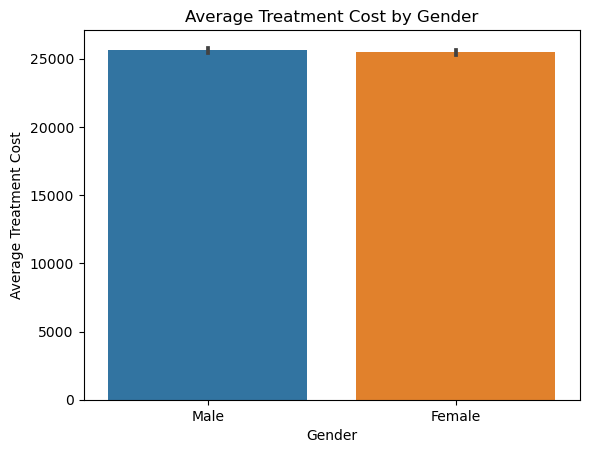

In [23]:
sns.barplot(x=df['Gender'],y=df['Billing Amount'], data=gender_avg_cost)
plt.xlabel('Gender')
plt.ylabel('Average Treatment Cost')
plt.title('Average Treatment Cost by Gender')

<Axes: xlabel='Age', ylabel='Days'>

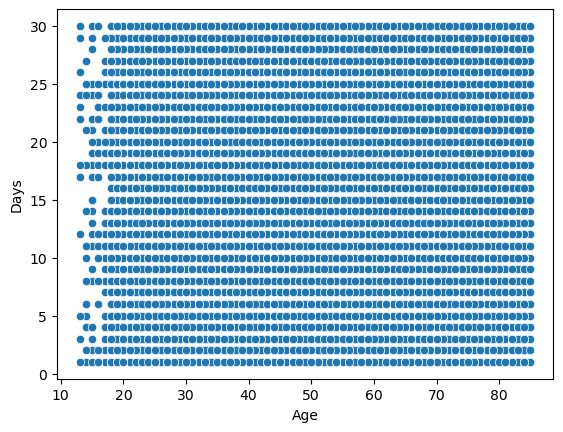

In [24]:
sns.scatterplot(x='Age',y='Days',data=df)

The scatter plot shows no strong relationship between patient age and hospital stay duration.
Hospital stay length appears relatively independent of age, suggesting that factors such as medical condition and admission type play a more significant role than age alone.

Text(0, 0.5, 'Average Days')

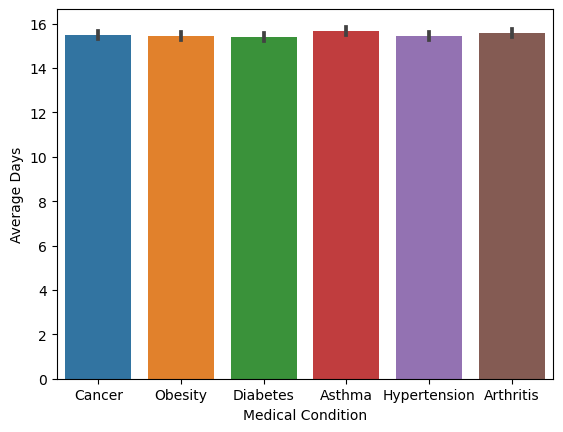

In [25]:
dcs_avg_stay = df.groupby('Medical Condition')['Days'].mean().reset_index()

sns.barplot(x=df['Medical Condition'],y=df['Days'], data=dcs_avg_stay)
plt.ylabel("Average Days")

<Axes: xlabel='Medical Condition', ylabel='Billing Amount'>

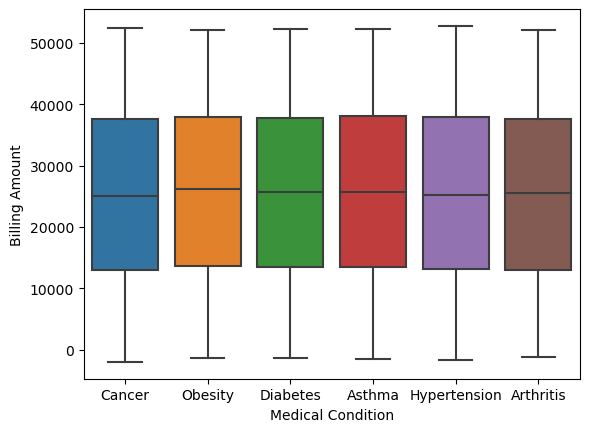

In [26]:
sns.boxplot(y=df['Billing Amount'],x=df['Medical Condition'])

In [27]:
datacorr = df[['Age','Billing Amount','Room Number','Days']]
datacorr.corr()

,Age,Billing Amount,Room Number,Days
Age,1.000000,-0.000968,-0.001001,0.007894
Billing Amount,-0.000968,1.000000,-0.003899,-0.004595
Room Number,-0.001001,-0.003899,1.000000,-0.004652
Days,0.007894,-0.004595,-0.004652,1.000000


<Axes: >

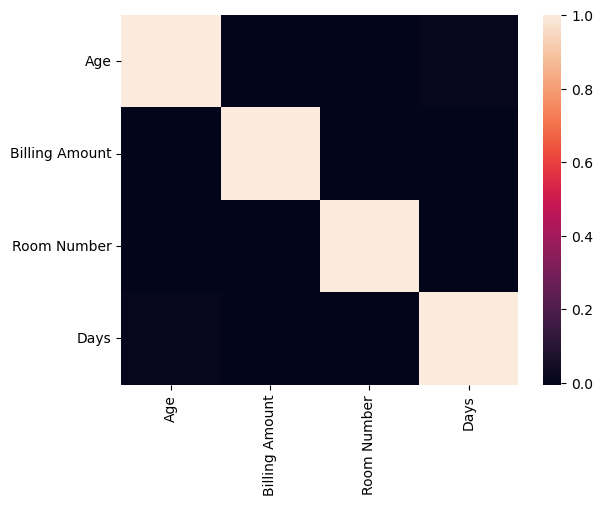

In [28]:
sns.heatmap(datacorr.corr())

No Variable shows any strong correlation with Treatment cost


Length of stay is not strongly correlated with any numeric variable shown.

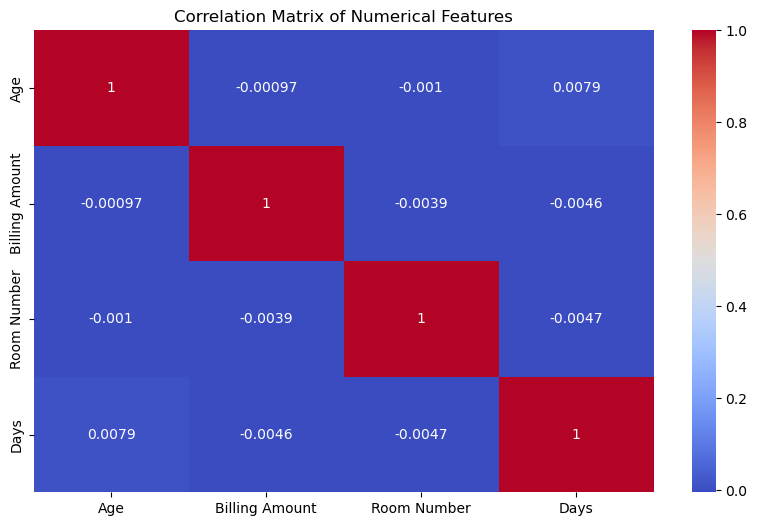

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [30]:
def categories(x):
    if x <= 18:
        return "Child"
    elif (x > 18 and x <= 60):
        return "Adult"
    else:
        return "Senior"

In [31]:
df['Age Group'] = df['Age'].apply(categories)

In [32]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days,Age Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Adult
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Senior
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Senior
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Adult
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Adult


In [33]:
df['Age Group'].value_counts()

Age Group
Adult     30891
Senior    18271
Child       838
Name: count, dtype: int64

<Axes: xlabel='Age Group', ylabel='count'>

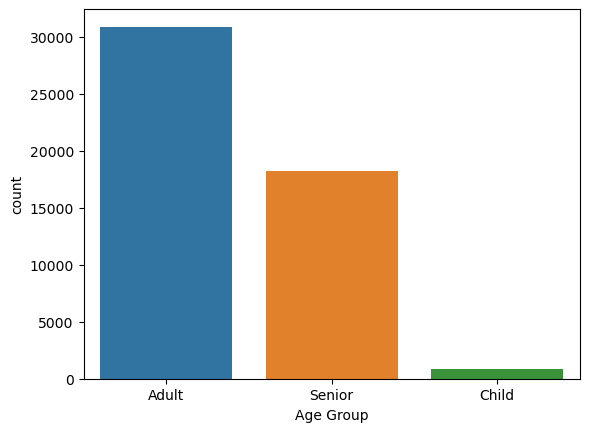

In [34]:
sns.countplot(x=df['Age Group'])

Text(0.5, 1.0, 'Comparison Between Age Group and Medical Condition')

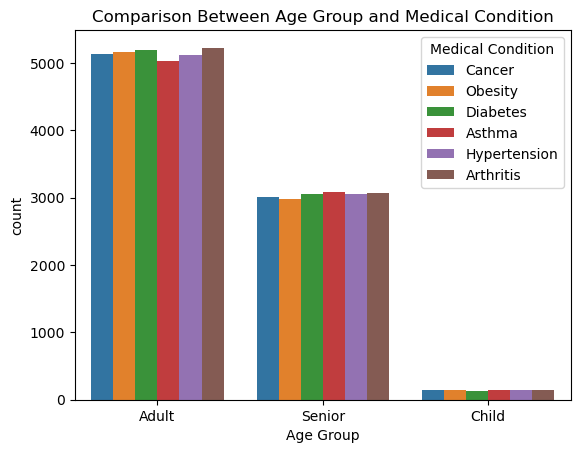

In [35]:
sns.countplot(x='Age Group',hue='Medical Condition',data=df)
plt.title("Comparison Between Age Group and Medical Condition")

<Axes: xlabel='Medical Condition', ylabel='Age Group'>

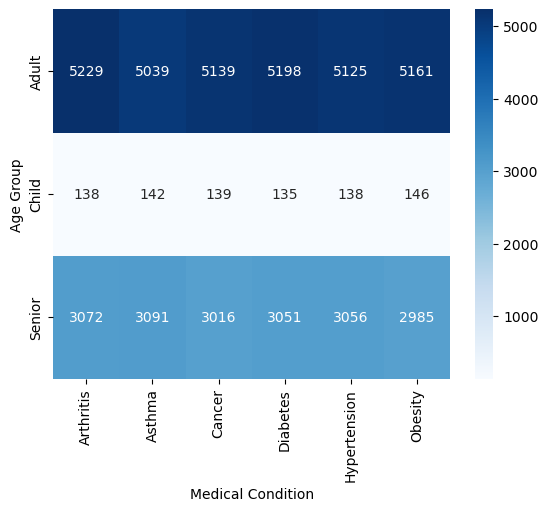

In [36]:
cross_tab = pd.crosstab(df['Age Group'], df['Medical Condition'])

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')

In [37]:
df['Billing Amount'] = df['Billing Amount'].abs()
df['Billing Amount'].min()


9.238787497393332

In [38]:
df['Billing Amount'].max()

52764.276736469175

In [39]:
def category(x):
    if x < 10000:
        return "Low Cost"
    elif x < 25000:
        return "Medium Cost"
    else:
        return "High Cost"

In [40]:
df['Cost Categories'] = df['Billing Amount'].apply(category)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days,Age Group,Cost Categories
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,Adult,Medium Cost
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Senior,High Cost
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,Senior,High Cost
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,Adult,High Cost
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,Adult,Medium Cost


Text(0.5, 1.0, 'Comaprison Between Age Group and Cost Categories')

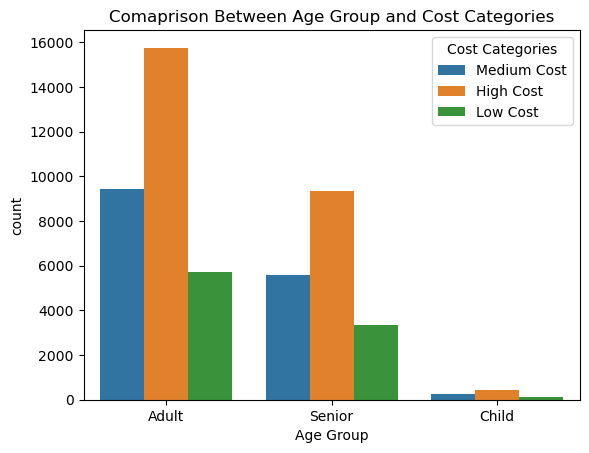

In [41]:
sns.countplot(hue='Cost Categories',x='Age Group',data=df)
plt.title("Comaprison Between Age Group and Cost Categories")

Text(0.5, 1.0, 'Average Hospital Stay Across Age Groups')

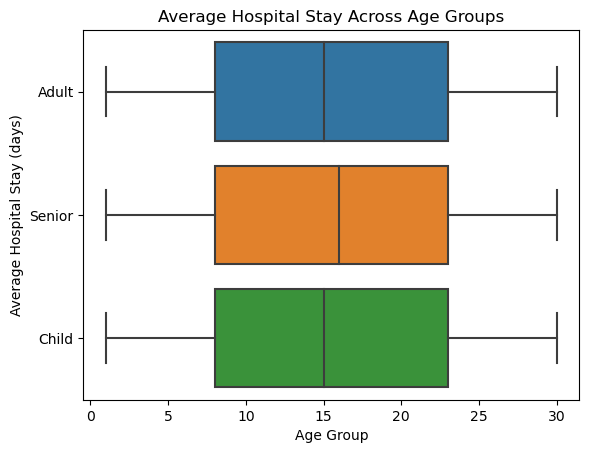

In [42]:
sns.boxplot(y='Age Group',x='Days',data=df)
plt.xlabel('Age Group')
plt.ylabel('Average Hospital Stay (days)')
plt.title('Average Hospital Stay Across Age Groups')

From the boxplot, length of stay appears similar across age groups, with no significant variation in median stay duration.

Text(0.5, 1.0, 'Comparison Between Cost Categories and Medical Condition')

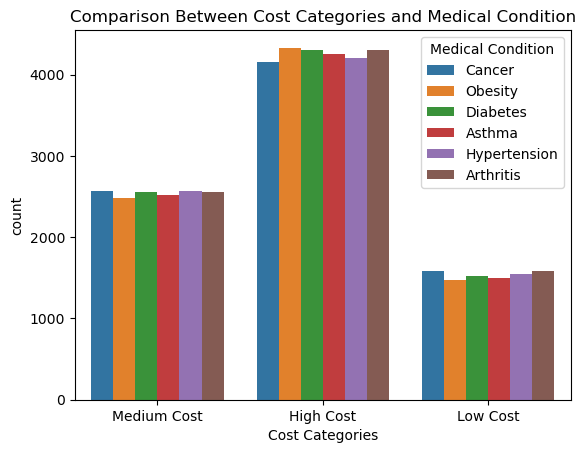

In [43]:
sns.countplot(x='Cost Categories',hue='Medical Condition',data=df)
plt.title("Comparison Between Cost Categories and Medical Condition")

<Axes: xlabel='Medical Condition', ylabel='Days'>

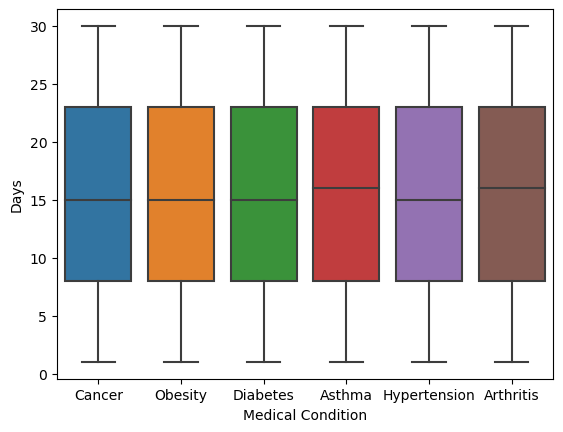

In [44]:
sns.boxplot(x='Medical Condition',y='Days',data=df)

In [45]:
df.groupby('Age Group')['Billing Amount'].agg(['mean','median'])


,mean,median
Age Group,,
Adult,25547.041568,25511.333968
Child,26614.555643,27444.554342
Senior,25526.967320,25540.390489


Childs have the highest average billing amount compared to other age groups, indicating higher treatment costs in this category.

## 6. Insights & Conclusion

### Which age group consumes the highest healthcare cost?

-> Adult Age Group consumes the higest healthcare cost

### Which disease type results in:

### Highest treatment cost?
->  All medical Condition/Disease type looks similiar across all the cost categories.

### Longest hospital stay?
-> All Medical Conditions looks similiar across all hospital stay duration

### Are senior patients more likely to have:

### Longer stays?
-> Based on the boxplot of length of stay by age group, all age categories show similar median values, suggesting that age does not significantly affect hospital stay duration.

### Higher costs?
-> No, Adult Age Group has more higher cost than seniors

### What factors seem most important for:

### High treatment cost?
-> High treatment costs are primarily driven by medical condition and admission type rather than patient demographics. Emergency admissions and severe medical conditions account for the majority of high-cost cases.

### Poor outcomes? (if outcome column exists)
-> Poor patient outcomes are more closely associated with disease severity and emergency admissions rather than demographic factors such as age or gender.

# Distribution of Test Results (Target Variable)


Text(0.5, 1.0, 'Distribution of Test Results')

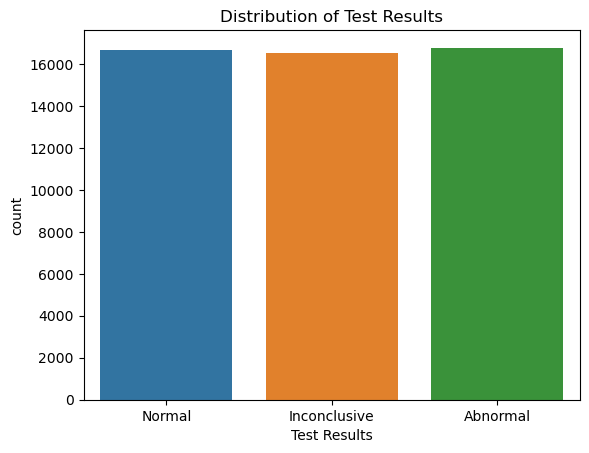

In [46]:
sns.countplot(x='Test Results',data=df)
plt.title("Distribution of Test Results")

The Test Results distribution shows that All Categories is the common outcome.

# Billing Amount by Age Group


Text(0.5, 1.0, 'Comparison Between Age Group and Test Results')

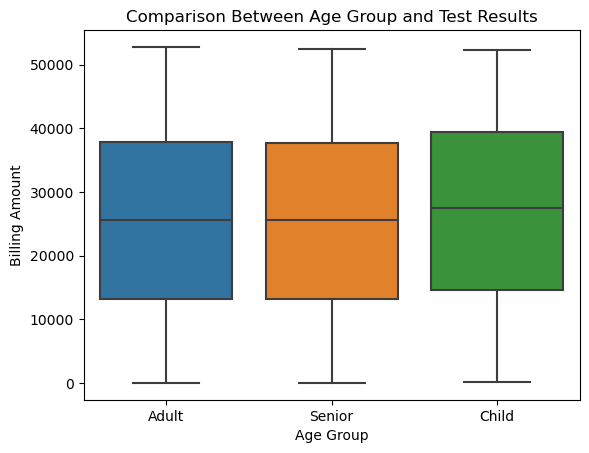

In [47]:
sns.boxplot(x='Age Group',y='Billing Amount',data=df)
plt.title("Comparison Between Age Group and Test Results")

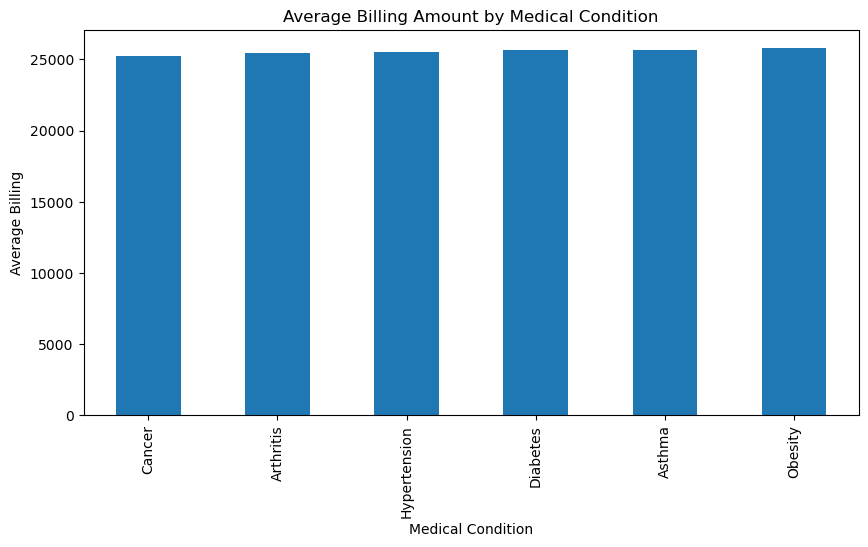

In [48]:
avg_billing = df.groupby("Medical Condition")["Billing Amount"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_billing.plot(kind='bar')
plt.title("Average Billing Amount by Medical Condition")
plt.ylabel("Average Billing")
plt.show()


Both the boxplot and grouped mean values indicate that children incur higher billing amounts compared to other age groups.

## 📌 Key Insights

- Majority of patients fall between X–Y age group.
- Certain medical conditions show significantly higher billing amounts.
- Duplicate records were identified and resolved to improve data quality.
- Age and billing amount show (weak/moderate/strong) correlation.
